## 《Python程序设计》2023秋季
**<font size=4>10 Python科学计算</font>**

**机械科学与工程学院  刘潇**

本节要点包括：
- 了解科学计算的实现过程
- 掌握Numpy模块数组对象的创建和常用方法
- 掌握Scipy和Matplotlib模块的常用方法

### 列表相乘

In [7]:
a = [1, 2]
print(a * 2)

# 列表乘法运算符重载
class lst(list):
    def __init__(self, *x):
        list.__init__(self)
        self.number = x
        
    def __mul__(self, other):
        return [x*other for x in self.number]

b = lst(1, 2)
print(b * 2)

[1, 2, 1, 2]
[2, 4]


### Numpy

In [3]:
import numpy as np # 导入numpy模块，简写为np
print(np.__doc__)


NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >>> x = x + 1

Use the built-in ``help`` function to view a function's docstring::

  >>> help(np.sort)
  ... # doctest: +SKIP

For some objects, ``np.info(obj)`` may provide additional help.  This is
particularl

### 创建数组

In [18]:
# print(np.array.__doc__)
a = np.array([1, 2]) # 从列表创建数组
print(a * 2)
print(type(a), a.__class__)

# 可以是字符串
b = np.array([1, "a"])
print(b)
# print(b * 2) # 不支持数组的运算

[2 4]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
['1' 'a']


### 多维数组

In [34]:
# 0维
print(np.array(1))

# 1维
print(np.array((1, 2, 3, 4, 5)))

# 2维
print(np.array(([1, 2, 3, 4, 5],(1, 2, 3, 4, 5))))

# 3维
print(np.array([[[1, 2],[3, 4]],[[5, 6],[7, 8]]]))

# 多维数组
c = np.array([1, 2, 3, 4, 5], ndmin = 5)
print(c, c.ndim)

1
[1 2 3 4 5]
[[1 2 3 4 5]
 [1 2 3 4 5]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[[[[[1 2 3 4 5]]]]] 5


### 其他创建数组的函数

In [148]:
print(np.arange(1,5,1))
print(np.linspace(0,2*np.pi,10))
print(np.random.rand(2,3))
print(np.ones((2,3)))
print(np.zeros((2,3)))
print(np.indices((2,3)))
a, b = np.indices((2,3))
print(a, b, sep = "\n")

[1 2 3 4]
[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
[[0.12387708 0.73663296 0.7847359 ]
 [0.44069413 0.8830835  0.54260579]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[[0 0 0]
  [1 1 1]]

 [[0 1 2]
  [0 1 2]]]
[[0 0 0]
 [1 1 1]]
[[0 1 2]
 [0 1 2]]


### 数组的常用属性

In [76]:
a = np.ones((3,3))
print(a)
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype, a.itemsize, a.data)
for x in a.flat:
    print(x, end = " ")

print("")
b = np.array([[1,2,3],[4,5,6]])
for x in b.flat:
    print(x, end = " ")

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
2
(3, 3)
9
float64 8 <memory at 0x00000000071C86C0>
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
1 2 3 4 5 6 

### 变形

In [93]:
a = np.array([[1, 2, 3],[4, 5, 6]])
print(a.shape)
b = a.reshape(3, 2)
print(b)
b.resize(1,6)
print(b)
b.resize(6)
print(b)

c = a.swapaxes(0,1)
d = a.flatten()
print(c, d)

(2, 3)
[[1 2]
 [3 4]
 [5 6]]
[[1 2 3 4 5 6]]
[1 2 3 4 5 6]
[[1 4]
 [2 5]
 [3 6]] [1 2 3 4 5 6]


In [101]:
a = np.arange(1,13)
print(a, a.shape)
b = a.reshape(2, 3, 2)
print(b)
c = b.swapaxes(0,2)
print(c)
d = b.flatten()
print(d)

[ 1  2  3  4  5  6  7  8  9 10 11 12] (12,)
[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]
[[[ 1  7]
  [ 3  9]
  [ 5 11]]

 [[ 2  8]
  [ 4 10]
  [ 6 12]]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [104]:
b1, b2, b3 = np.indices(b.shape)
print(b1, b2, b3, sep = "\n")

[[[0 0]
  [0 0]
  [0 0]]

 [[1 1]
  [1 1]
  [1 1]]]
[[[0 0]
  [1 1]
  [2 2]]

 [[0 0]
  [1 1]
  [2 2]]]
[[[0 1]
  [0 1]
  [0 1]]

 [[0 1]
  [0 1]
  [0 1]]]


### 索引和切片

In [126]:
# 一维数组
a = np.arange(12)
print(a[1], a[-1], a[1:4], a[1:6:2])

# 多维数组
b = a.reshape(2,2,3)
print(b)
print(b[0,1,2])
print(b[0,0,:])
print(b[0,0,:-1])
print(b[0,:,:-1])

1 11 [1 2 3] [1 3 5]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
5
[0 1 2]
[0 1]
[[0 1]
 [3 4]]


In [124]:
# 列表索引与切片
listb = [[[0,1,2],[3,4,5]],[[6,7,8],[9,10,11]]]
print(listb)
print(listb[0][1][2])
print(listb[0][0][:])

[[[0, 1, 2], [3, 4, 5]], [[6, 7, 8], [9, 10, 11]]]
5
[0, 1, 2]


In [127]:
print(b[np.array([[0,0],[0,0]]),np.array([[0,0],[1,1]]),np.array([[0,2],[0,2]])])

[[0 2]
 [3 5]]


### 四则运算

In [136]:
data = np.array([1,2])
ones = np.ones(2)
print(data, ones)

print("data + ones = ", data+ones)
print("data - ones = ", data-ones)
print("data * ones = ", data*ones)
print("data / ones = ", data/ones)
print("data * 2 = ", data*2)

[1 2] [1. 1.]
data + ones =  [2. 3.]
data - ones =  [0. 1.]
data * ones =  [1. 2.]
data / ones =  [1. 2.]
data * 2 =  [2 4]


### 广播原则

In [142]:
data = np.arange(1,7).reshape(3,2)
ones = np.ones((1,2))
print(data+ones)

# 各维度长度相同或者有维度长度为1才能计算
ones = np.ones((2,2))
print(data+ones)

[[2. 3.]
 [4. 5.]
 [6. 7.]]


ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

### 数组运算函数

[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
[ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]


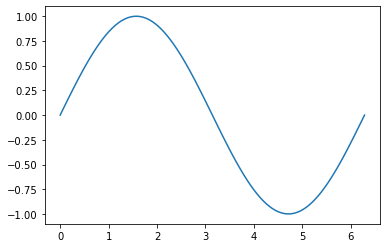

In [147]:
import matplotlib.pyplot as plt
x = np.linspace(0,2*np.pi,10)
y = np.sin(x)
print(x, y, sep = "\n")

x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [153]:
import time, math
x = [i for i in range(10000000)]
y, z = [], []
# math.sin()
start_time = time.perf_counter()
for i in x:
    y.append(math.sin(i))
during_time = time.perf_counter() - start_time
print("math.sin: {}".format(during_time))

# np.sin()
start_time = time.perf_counter()
X = np.array(x)
Y = np.sin(X)
during_time = time.perf_counter() - start_time
print("np.sin: {}".format(during_time))

# np.sin()
start_time = time.perf_counter()
for i in x:
    z.append(np.sin(i))
during_time = time.perf_counter() - start_time
print("np.sin: {}".format(during_time))

math.sin: 2.5630429979937617
np.sin: 0.635888981007156
np.sin: 10.226119162005489


### 数组运算函数

In [154]:
data = np.array([1,2,3])
powers_of_ten1 = np.array([1,10,100])
powers_of_ten2 = np.array([[1,10], [100,1000], [10000, 100000]])
print(np.dot(data, powers_of_ten1))
print(np.dot(data, powers_of_ten2))

321
[ 30201 302010]


In [139]:
a = np.array([1,2,3])
b = np.array([2,2,3])
# 向量乘法
np.dot(a,b)

15

### 数组的常用运算函数

In [129]:
data = np.array([1, 2, 3])
print(np.min(data), np.max(data), np.sum(data))
print(np.mean(data), np.prod(data), np.std(data))

1 3 6
2.0 6 0.816496580927726


### Scipy

In [157]:
import scipy
# print(dir(scipy))
print(scipy.__doc__)


SciPy: A scientific computing package for Python

Documentation is available in the docstrings and
online at https://docs.scipy.org.

Contents
--------
SciPy imports all the functions from the NumPy namespace, and in
addition provides:

Subpackages
-----------
Using any of these subpackages requires an explicit import. For example,
``import scipy.cluster``.

::

 cluster                      --- Vector Quantization / Kmeans
 fft                          --- Discrete Fourier transforms
 fftpack                      --- Legacy discrete Fourier transforms
 integrate                    --- Integration routines
 interpolate                  --- Interpolation Tools
 io                           --- Data input and output
 linalg                       --- Linear algebra routines
 linalg.blas                  --- Wrappers to BLAS library
 linalg.lapack                --- Wrappers to LAPACK library
 misc                         --- Various utilities that don't have
                             

### 线性回归模型

In [175]:
import numpy as np
from scipy.optimize import curve_fit
# 产生数据
x = [i * 0.1 for i in range(100)]
y = list(map(lambda i:i+2, x))

# 添加噪音
X, Y = np.array(x), np.array(y)
Yn = Y + 0.9 * np.random.normal(size=len(x))

# 函数模型拟合
def func(x, a, b):
    return a*x+b
popt, pcov = curve_fit(func, X, Yn)
print(popt)
print(pcov)

[0.99335615 2.10865386]
[[ 0.00095351 -0.00471988]
 [-0.00471988  0.03130857]]


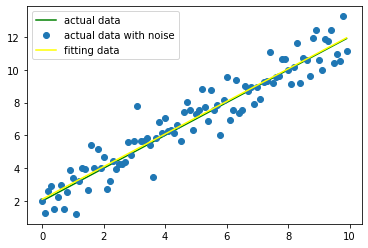

In [176]:
import matplotlib.pyplot as plt
yfit = func(X, popt[0], popt[1])
plt.plot(X, Y, color="green", label="actual data")
plt.plot(X, Yn, "o", label="actual data with noise")
plt.plot(X, yfit, color="yellow", label="fitting data")
plt.legend(loc="best")
plt.show()

### 非线性回归模型

In [201]:
import numpy as np
from scipy.optimize import curve_fit
# 函数模型拟合
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

# 产生数据
X = np.array([i * 0.1 for i in range(-50, 150)])
Y = func(X, 1, 5, 2)

# 添加噪音
Yn = Y + 0.2 * np.random.normal(size=len(X))

p0 = [1.2, 4, 3] # 初步猜测参数，如果没有默认全为1
#popt, pcov = curve_fit(func, X, Yn)
popt, pcov = curve_fit(func, X, Yn, p0 = p0)
print(popt)

[1.01097681 5.15279245 1.90647877]


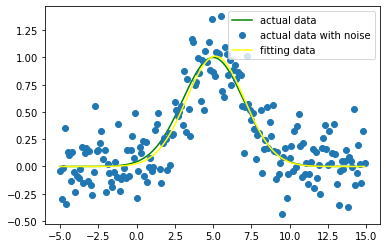

In [202]:
import matplotlib.pyplot as plt
yfit = func(X, *tuple(popt))
plt.plot(X, Y, color="green", label="actual data")
plt.plot(X, Yn, "o", label="actual data with noise")
plt.plot(X, yfit, color="yellow", label="fitting data")
plt.legend(loc="best")
plt.show()

### Matplotlib

In [204]:
import matplotlib
# print(dir(matplotlib))
print(matplotlib.__doc__)


This is an object-oriented plotting library.

A procedural interface is provided by the companion pyplot module,
which may be imported directly, e.g.::

    import matplotlib.pyplot as plt

or using ipython::

    ipython

at your terminal, followed by::

    In [1]: %matplotlib
    In [2]: import matplotlib.pyplot as plt

at the ipython shell prompt.

For the most part, direct use of the object-oriented library is
encouraged when programming; pyplot is primarily for working
interactively.  The
exceptions are the pyplot commands :func:`~matplotlib.pyplot.figure`,
:func:`~matplotlib.pyplot.subplot`,
:func:`~matplotlib.pyplot.subplots`, and
:func:`~pyplot.savefig`, which can greatly simplify scripting.

Modules include:

    :mod:`matplotlib.axes`
        defines the :class:`~matplotlib.axes.Axes` class.  Most pyplot
        commands are wrappers for :class:`~matplotlib.axes.Axes`
        methods.  The axes module is the highest level of OO access to
        the library.

    :mod:`matp

### 数据曲线

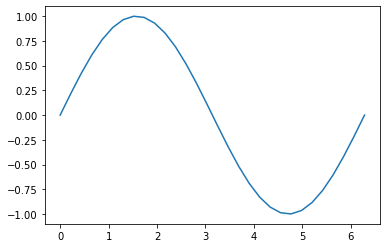

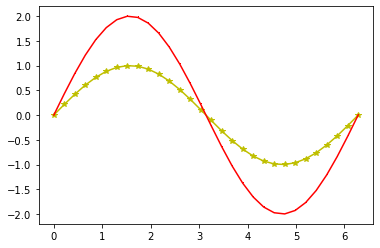

In [210]:
import matplotlib.pyplot as plt
X = np.linspace(0, 2*np.pi, 30)
Y = np.sin(X)
plt.plot(X,Y)
plt.show()

# 调整样式
plt.plot(X, Y, "y*-")
plt.plot(X, Y*2, "r--")
plt.show()

### 图注

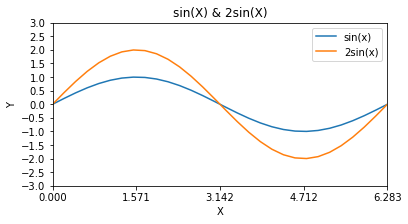

In [225]:
plt.figure(figsize=(6,3)) # 设置图片大小
plt.plot(X, Y, label = "sin(x)") # 曲线标注
plt.plot(X, Y*2, label = "2sin(x)") # 曲线标注
plt.legend(loc="best")
plt.title("sin(X) & 2sin(X)") # 标题
plt.xlim((0, np.pi+1)) # x轴范围
plt.ylim((-3,3)) # y轴范围
plt.xlabel("X") # x轴名称
plt.ylabel("Y") # y轴名称
plt.xticks((0, np.pi*0.5, np.pi, np.pi*1.5, np.pi*2)) # x轴刻度精度
plt.yticks(np.linspace(-3,3,13)) # y轴刻度精度
plt.show()

### 散点图

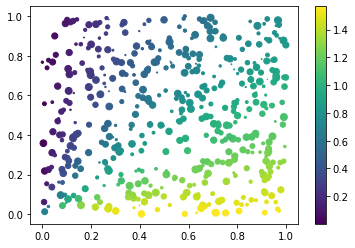

In [227]:
import matplotlib.pyplot as plt

# 生成数据点
k = 500
x = np.random.rand(k)
y = np.random.rand(k)

# 生成每个点的大小、颜色
size = 50*np.random.rand(k)
colour = np.arctan2(x, y)

# 画图并添加颜色栏（colorbar）
plt.scatter(x, y, s=size, c=colour)
plt.colorbar()
plt.show()

### 柱状图

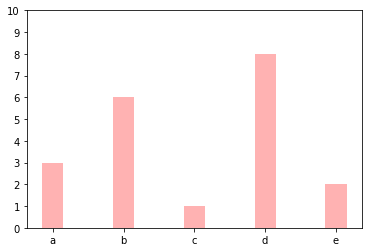

In [234]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [3,6,1,8,2]
plt.bar(x,y, width=0.3, color='r', alpha=0.3) 
plt.xticks(x, ["a","b","c","d","e"])
plt.yticks(np.linspace(0,10,11))
plt.show()